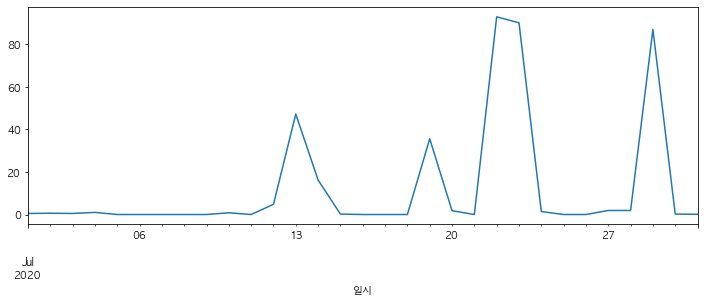

In [1]:
import pandas as pd
import tqdm


# 클래스로 리팩토링
class Weather_2020:
    # PATH_SRC = 'coding_TIL/TIL_2021/210426_데이터셋_2020년 기온 데이터_강수량 프로젝트.csv'

    def __init__(self, path_src=''):
        self.path_src = path_src

    def make_df_rain(self, path_src):
        df = pd.read_csv(path_src, encoding='cp949')
        # 원하는 칼럼만 추출 df[[,,,]]
        df = df[['일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
                 '일강수량(mm)', '최대 풍속(m/s)', '평균 풍속(m/s)']]
        return df

    def count_rain_day(self, PATH_SRC):
        df = self.make_df_rain(PATH_SRC)
        rain_amount = input('얼마이상의 강수량의 날을 알고 싶으세요? ')
        # 2020년 비가 온날 카운트하기
        day_rain = df.loc[df['일강수량(mm)'] > int(rain_amount)]
        print(f'2020년에 {rain_amount}mm이상 비가 온날은 {len(day_rain)}일 입니다.')

    def get_riding_dist(self):
        df = self.make_df_rain(PATH_SRC)
        rain_amount = input('얼마 이상의 강수량의 날을 알고 싶으세요? ')
        # 2020년 비가 온날 카운트하기
        day_rain = df.loc[df['일강수량(mm)'] > int(rain_amount)]
        print(f'2020년에 자전거를 {(365 - len(day_rain)) * 14}km를 탔습니다.')

# 데이터 찾기
    # 기상청 기상자료 개방포털에서 수집
    # https://data.kma.go.kr/data/grnd/selectAwosRltmList.do?pgmNo=638
    # 파일 경로
PATH_SRC = '210426_데이터셋_2020년 기온 데이터_강수량 프로젝트.csv'


# 인스턴트 생성
weather = Weather_2020()


# 월별 강수량 그래프 출력
df = weather.make_df_rain(PATH_SRC)

# 일시 시계열 데이터로 변환하기
df['일시'] = pd.to_datetime(df['일시'])

# 날짜를 인덱스로 바꾸기
df = df.set_index(['일시'])

# 강수량 결측치 0으로 바꾸기
df['일강수량(mm)'] = df['일강수량(mm)'].fillna(0)

# 6월 데이터 프레임 만들기
month_06 = df.loc['2020-06-01':'2020-06-30']

# 7월 데이터 프레임 만들기
month_07 = df.loc['2020-07-01':'2020-07-31']

# 8월 데이터 프레임 만들기
month_08 = df.loc['2020-08-01':'2020-08-31']

# 날짜별로 강수량 그래프로 표시하기
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
%matplotlib inline
warnings.filterwarnings(action = 'ignore')  # 에러메세지 처리
rc('font', family = 'AppleGothic')  # 한글폰트 설정
month_07['일강수량(mm)'].plot(figsize=(12, 4))

# 칼럼 리스트 만들기
lst_col = ['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '최대 풍속(m/s)',
       '평균 풍속(m/s)']

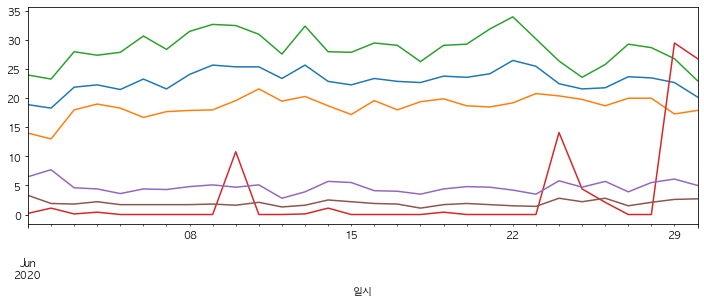

In [2]:
# 날짜별로 평균기온 그래프로 표시하기
for i in lst_col:
    month_06[i].plot(figsize=(12, 4))
plt.show()

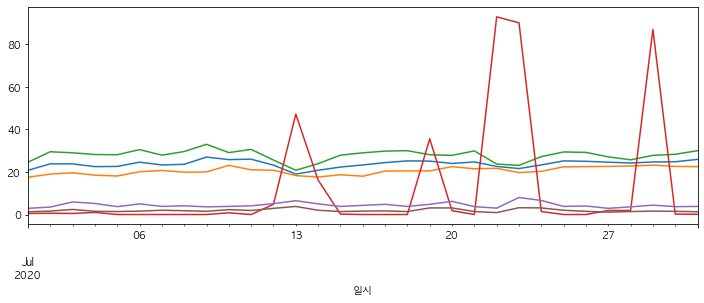

In [3]:
# 날짜별로 평균기온 그래프로 표시하기
for i in lst_col:
    month_07[i].plot(figsize=(12, 4))
plt.show()

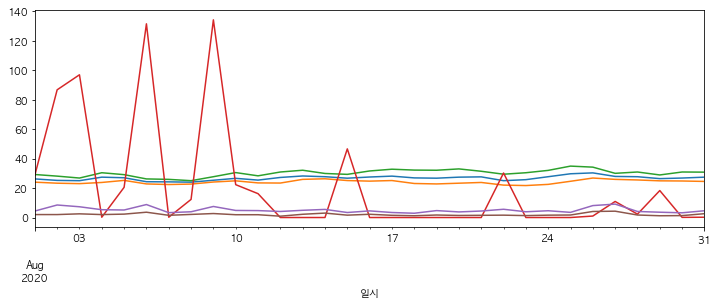

In [4]:
# 날짜별로 평균기온 그래프로 표시하기
for i in lst_col:
    month_08[i].plot(figsize=(12, 4))
plt.show()